<a href="https://colab.research.google.com/github/gamzenurmadan/linear-regression-boston-dataset/blob/main/260201084_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework #1   Due date: 27 October 2022, 11:59 PM

## Q1) One feature regression for Boston data. 
Choose one of the features in Boston data, try to select one that is mostly correlated (or inversely correlated) with the target. Fit a line with linear regression (you can use built-in LinearRegression() method). What is the equation of the fitting line? Please plot your data points (chosen feature vs. target) and plot your fitting line on it.

In [ ]:
#Imports
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression #for Q2
from sklearn.model_selection import train_test_split #for Q3

#Loading data
boston_dataset = load_boston()

#Loading data into a dataframe to check correlation
boston_df = pd.DataFrame(data=np.c_[boston_dataset['data'], boston_dataset['target']],columns= list(boston_dataset['feature_names']) + ['target'])

cor_matrix = boston_df.corr() 
print(cor_matrix)  #as a result, I chose LSTAT since it is mostly inversely correlated with the target.


             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
#finding equation of the fitting line

X = np.array(boston_df['LSTAT']).reshape((-1, 1)) #reshaping because fit() needs 2d array
y = boston_df['target']

model = LinearRegression() #linear regression model
model.fit(X,y)
#for the equation of the fitting line
interception = model.intercept_
coefficient = model.coef_

print("interception theta_0:", interception)
print("coefficient theta_i:", coefficient)

print("Equation of the fitting line: \ry=", interception, "+" ,coefficient[0],"x")

interception theta_0: 34.5538408793831
coefficient theta_i: [-0.95004935]
y= 34.5538408793831 + -0.9500493537579906 x


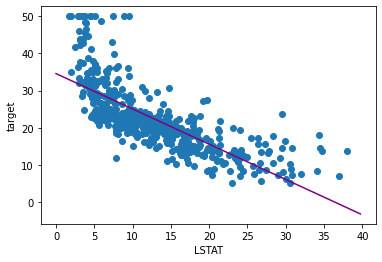

In [ ]:
#plotting data points and fitting line
f = lambda x: coefficient[0] * x + interception
steps = list(np.arange(0,40,.25))
fitline = list(map(f, steps))
plt.plot(steps, fitline, color='purple')
plt.scatter(x=X, y=y)
plt.xlabel('LSTAT')
plt.ylabel('target')
plt.show()

## Q2) Another metric for performance evaluation
We have seen that LinearRegression() by *sklearn* provides a method called *score* which outputs a value with a maximum of 1 (the larger the better), which is good to evaluate the performance. 
Another common performance metric is mean sum of squared error (MSE):

$$\frac{1}{m} \sum_{i=1}^m \left(\underbrace{\theta^T x^{(i)}}_{\text{Prediction}} - \underbrace{y^{(i)}}_{\text{Target}}\right)^2$$

Please implement this metric and compute it when Boston data with all features are used. lr.score gave 0.74. What is the MSE?

Important restriction: Do NOT use *mean_squared_error* module from *sklearn.metrics*.

In [ ]:
#defining mse with the equation up there
def mse(target, prediction):
  target = np.array(target)
  prediction = np.array(prediction)
  subtraction = np.subtract(target, prediction)
  squared_substraction = np.square(subtraction)
  result = squared_substraction.mean()
  return result

In [ ]:
#Calculation of the features' mse value, I made a mistake before in my submitted homework, I calculated all the features seperately.

x_all = boston_dataset['data'] #corrected the mistake in here with taking all the feature in one variable.
model.fit(x_all, y)   #I did define target "y" before, so I'll use it here again
all_predicted = model.predict(x_all)

print(mse(y, all_predicted))

21.894831181729202


## Q3) Splitting the dataset
In the lecture we did training and evaluation (score) on the whole Boston dataset. This is bad. Use the code in Week 1 Python Notebook to:
- shuffle the data,
- select 60% of the data as a training set (do the line fitting), 40% as a test set,
- what is the score on the test data?
- what is the mean squared error?

In [ ]:
#shuffling and splitting the data
X_train, X_test, y_train, y_test = train_test_split(boston_dataset['data'], boston_dataset['target'], test_size=0.4 ,random_state=42) #stating random state more than 0 to get the same results always

model.fit(X_train, y_train) #training

LinearRegression()

In [ ]:
#score on the test data
model.score(X_test, y_test)

0.712514093611121

In [ ]:
#calculating the mean squared error
y_predicted = model.predict(X_test)
print(mse(y_test, y_predicted))

21.832709989577538
